In [1]:
import os
import plotnine as p9
import pandas as pd
import re
import json

In [2]:
df = pd.DataFrame()
for file in os.listdir('../data/performance_metrics'):
  df = pd.concat([
    df,
    pd.read_csv(os.path.join('../data/performance_metrics', file))
  ])

In [3]:
df.head()

,class,normalization,logarithm,differences,algorithm,hyper_parameters,precision,recall,f1_score,method,variance_threshold,accuracy
0,NO_EXOPLANETS,1,1,0,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",0.99646,0.99646,0.99646,features,NaN,0.99298
1,EXOPLANETS,1,1,0,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",0.60000,0.60000,0.60000,features,NaN,0.99298
2,NO_EXOPLANETS,1,1,0,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",0.99646,0.99646,0.99646,features,NaN,0.99298
3,EXOPLANETS,1,1,0,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",0.60000,0.60000,0.60000,features,NaN,0.99298
4,NO_EXOPLANETS,1,1,0,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",0.99123,1.00000,0.99559,features,NaN,0.99123


In [4]:
df_long = pd.melt(df, id_vars = ['class', 'normalization', 'logarithm', 'differences', 'algorithm', 'hyper_parameters', 'method', 'variance_threshold' ], var_name = 'metric', value_name = 'value')

In [5]:
df_long.head()

,class,normalization,logarithm,differences,algorithm,hyper_parameters,method,variance_threshold,metric,value
0,NO_EXOPLANETS,1,1,0,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",features,NaN,precision,0.99646
1,EXOPLANETS,1,1,0,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",features,NaN,precision,0.60000
2,NO_EXOPLANETS,1,1,0,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",features,NaN,precision,0.99646
3,EXOPLANETS,1,1,0,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",features,NaN,precision,0.60000
4,NO_EXOPLANETS,1,1,0,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",features,NaN,precision,0.99123


In [6]:
df_long[['algorithm', 'hyper_parameters']].drop_duplicates().shape[0]

244

In [7]:
df_long[['algorithm', 'hyper_parameters']].drop_duplicates()['algorithm'].value_counts()

Logistic Regression       70
K-Nearest Neighbours      60
Support Vector Machine    60
Random Forest             54
Name: algorithm, dtype: int64

# Rank Analysis

In [8]:
df_long.head()

,class,normalization,logarithm,differences,algorithm,hyper_parameters,method,variance_threshold,metric,value
0,NO_EXOPLANETS,1,1,0,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",features,NaN,precision,0.99646
1,EXOPLANETS,1,1,0,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",features,NaN,precision,0.60000
2,NO_EXOPLANETS,1,1,0,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",features,NaN,precision,0.99646
3,EXOPLANETS,1,1,0,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",features,NaN,precision,0.60000
4,NO_EXOPLANETS,1,1,0,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",features,NaN,precision,0.99123


In [9]:
df_long['class'] = df_long['class'].apply(lambda x : 'Stars without exoplanets' if x == 'NO_EXOPLANETS' else 'Stars with exoplanets')

In [10]:
df_long['data_transformation'] = df_long['normalization'].apply(lambda x : 'Normalization' if x == 1 else '')
df_long['data_transformation'] = df_long['data_transformation'] + ' ' + df_long['logarithm'].apply(lambda x : 'Logarithm' if x == 1 else '')
df_long['data_transformation'] = df_long['data_transformation'] + ' ' + df_long['differences'].apply(lambda x : 'Differences' if x == 1 else '')
df_long['data_transformation'] = df_long['data_transformation'].apply(lambda x : '\n+\n'.join(x.split()))
df_long['data_transformation'] = df_long['data_transformation'].apply(lambda x : 'None' if x == '' else x)

In [11]:
df_long['data_transformation'] = pd.Categorical(df_long['data_transformation'], ['None', 'Normalization', 'Differences', 'Normalization\n+\nDifferences', 'Logarithm', 'Normalization\n+\nLogarithm', 'Logarithm\n+\nDifferences', 'Normalization\n+\nLogarithm\n+\nDifferences'])

In [12]:
ranked_performance = df_long[(df_long['metric'] == 'f1_score') & (df_long['method'] == 'features')][['class', 'algorithm', 'hyper_parameters', 'value', 'data_transformation']].copy()
ranked_performance['rank'] = ranked_performance.groupby(by = ['class', 'algorithm', 'hyper_parameters'])['value'].rank(method = 'min', ascending = False).astype(int)
ranked_performance.head()

,class,algorithm,hyper_parameters,value,data_transformation,rank
78080,Stars without exoplanets,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",0.99646,Normalization\n+\nLogarithm,7
78081,Stars with exoplanets,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",0.60000,Normalization\n+\nLogarithm,8
78082,Stars without exoplanets,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",0.99646,Normalization\n+\nLogarithm,6
78083,Stars with exoplanets,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",0.60000,Normalization\n+\nLogarithm,6
78084,Stars without exoplanets,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",0.99559,Normalization\n+\nLogarithm,1


In [13]:
average_rank = ranked_performance[['class', 'algorithm', 'hyper_parameters', 'data_transformation', 'rank']] \
  .groupby(by = ['class', 'algorithm', 'data_transformation']).agg(rank_mean = ('rank', 'mean'), rank_sd = ('rank', 'std')).apply(lambda x : round(x, 3))
average_rank.reset_index(inplace = True)
average_rank['label'] = average_rank.apply(lambda x : str(round(x['rank_mean'], 1)) + ' ± ' + str(round(x['rank_sd'], 1)), axis = 1)

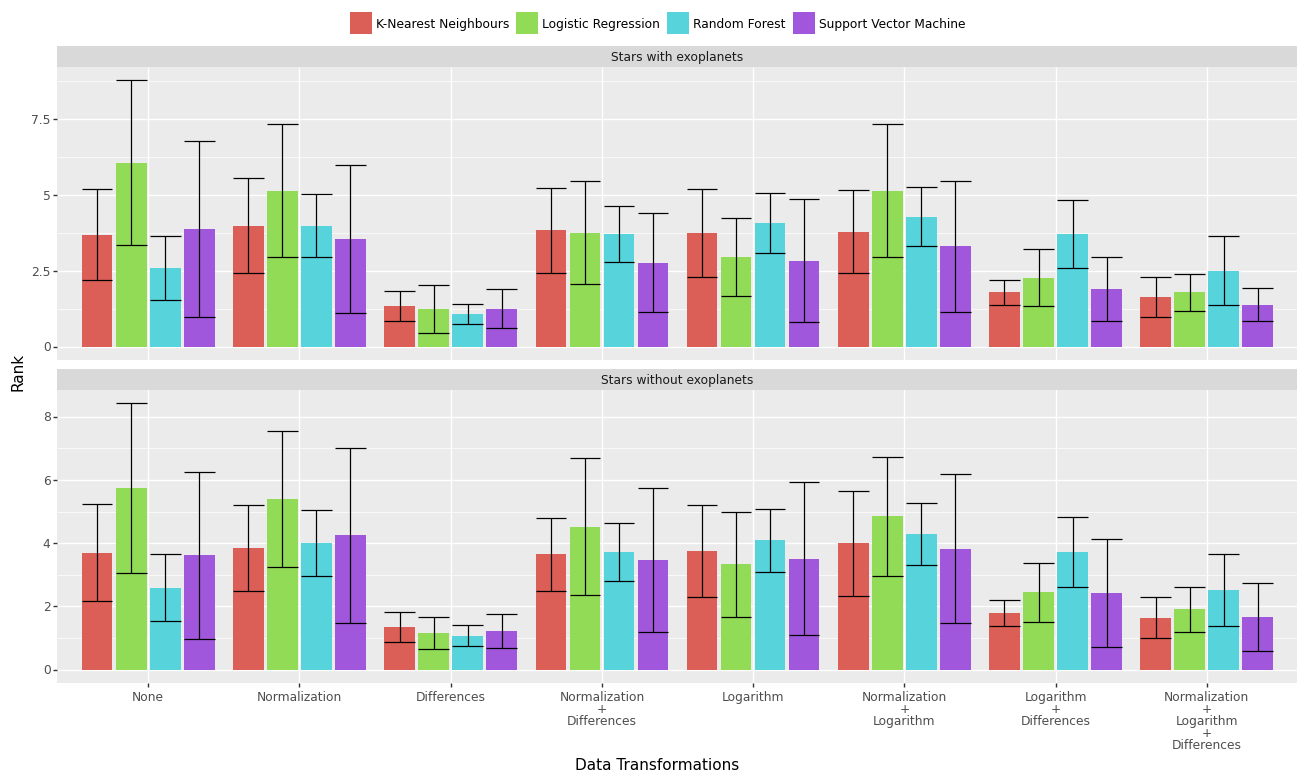

<ggplot: (679023487)>

In [14]:
#p9.geom_text(p9.aes(y = -0.3, label = 'label'), color = 'black', position = p9.position_dodge2(width = 0.9), size = 10) + \
#p9.aes(x = 'reorder(data_transformation, rank_mean)', y = 'rank_mean', fill = 'algorithm')
p9.ggplot(average_rank,
  p9.aes(x = 'data_transformation', y = 'rank_mean', fill = 'algorithm')
  ) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2()) + \
  p9.geom_errorbar(p9.aes(ymin = 'rank_mean - rank_sd', ymax = 'rank_mean + rank_sd'), position = p9.position_dodge2(), width = .9) + \
  p9.xlab('Data Transformations') + \
  p9.ylab('Rank') + \
  p9.facet_wrap(facets = '~class', ncol = 1, scales = 'free_y') + \
  p9.theme(
    legend_title = p9.element_blank(),
    legend_position = 'top',
    legend_box_margin = 0,
    subplots_adjust = {
      'hspace' : 0.1,
    },
    figure_size = (16, 8),
  )

In [15]:
average_rank_transformation = ranked_performance[['class', 'algorithm', 'hyper_parameters', 'data_transformation', 'rank']] \
  .groupby(by = ['class', 'data_transformation']).agg(rank_mean = ('rank', 'mean'), rank_sd = ('rank', 'std')).apply(lambda x : round(x, 3))
average_rank_transformation.reset_index(inplace = True)
average_rank_transformation['label'] = average_rank_transformation.apply(lambda x : str(round(x['rank_mean'], 1)) + ' ± ' + str(round(x['rank_sd'], 1)), axis = 1)

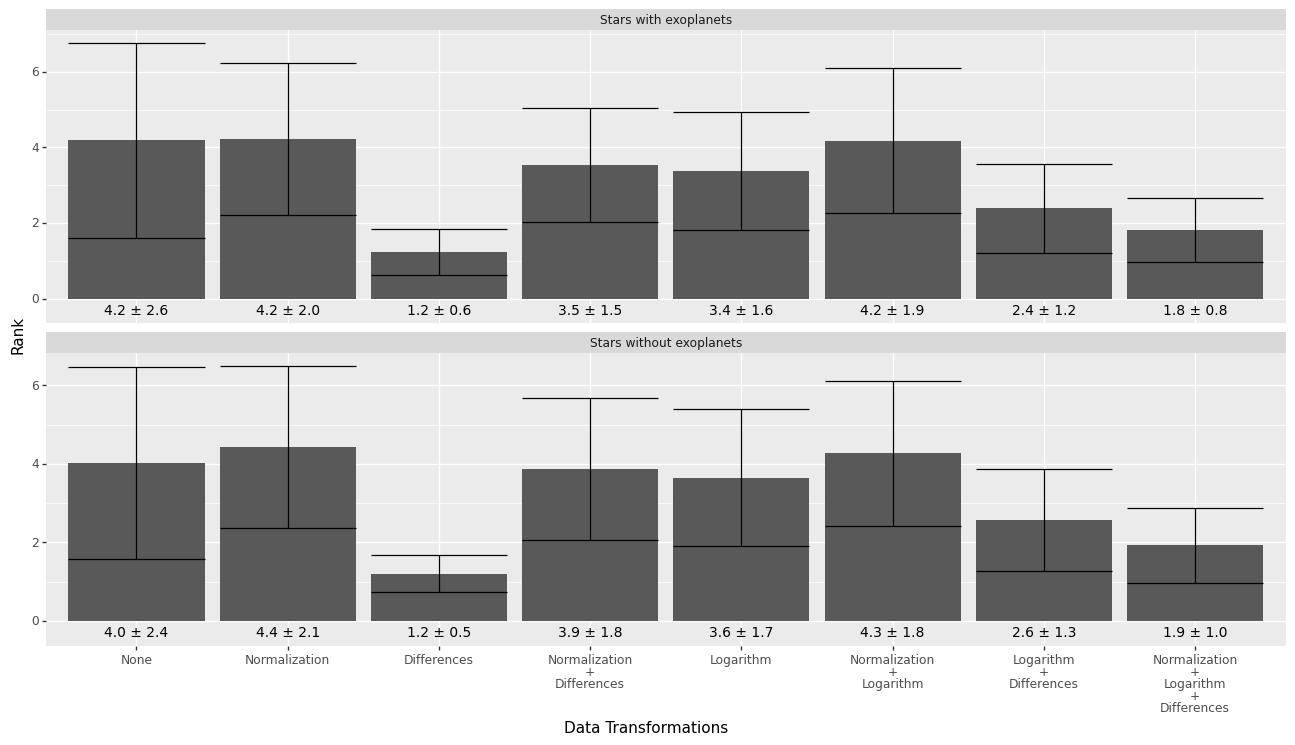

<ggplot: (679145172)>

In [16]:
#p9.aes(x = 'reorder(data_transformation, rank_mean)', y = 'rank_mean')
p9.ggplot(average_rank_transformation,
  p9.aes(x = 'data_transformation', y = 'rank_mean')
  ) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2()) + \
  p9.geom_errorbar(p9.aes(ymin = 'rank_mean - rank_sd', ymax = 'rank_mean + rank_sd'), position = p9.position_dodge2(), width = .9) + \
  p9.geom_text(p9.aes(y = -0.3, label = 'label'), color = 'black', position = p9.position_dodge2(width = 0.9), size = 10) + \
  p9.xlab('Data Transformations') + \
  p9.ylab('Rank') + \
  p9.facet_wrap(facets = '~class', ncol = 1, scales = 'free_y') + \
  p9.theme(
    legend_title = p9.element_blank(),
    legend_position = 'top',
    subplots_adjust = {
      'hspace' : 0.1,
    },
    figure_size = (16, 8),
  )

# Metric Analysis

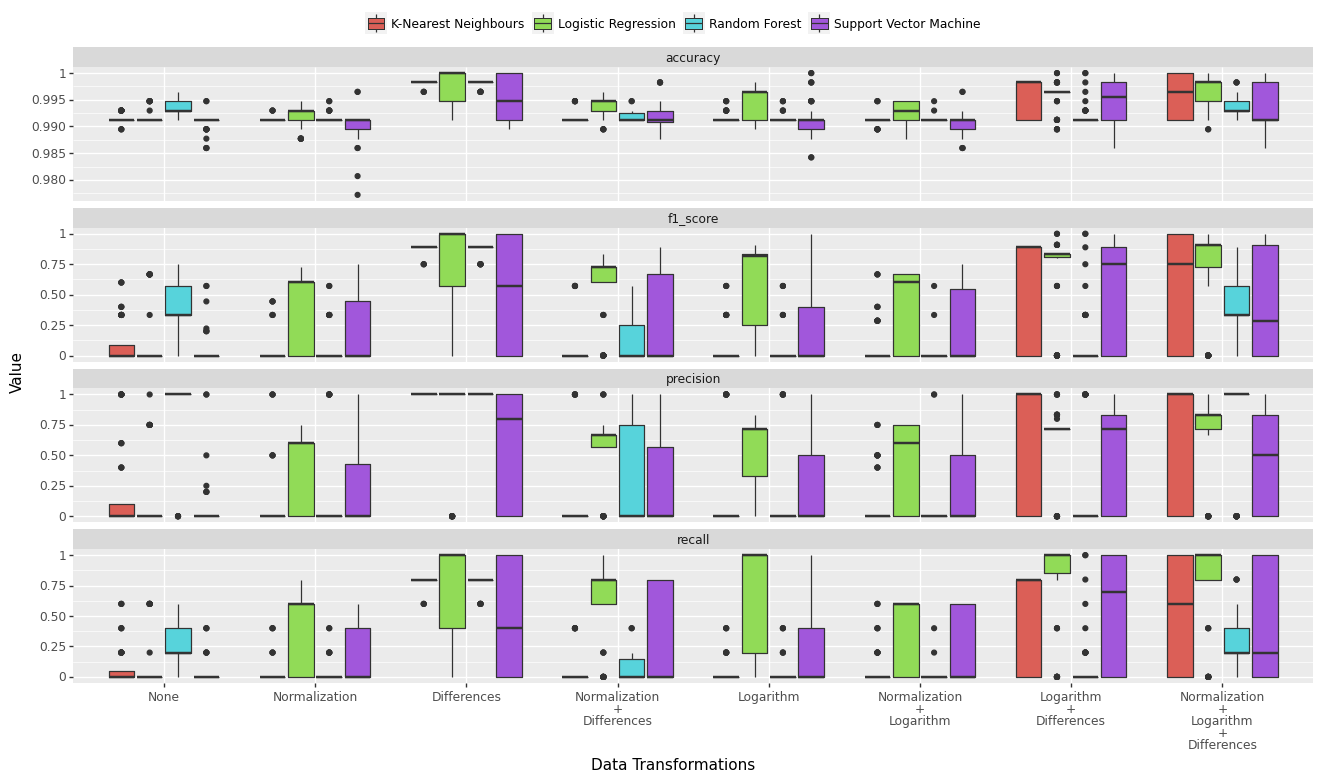

<ggplot: (679995089)>

In [17]:
p9.ggplot(df_long[(df_long['method'] == 'features') & (df_long['class'] == 'Stars with exoplanets')],
  p9.aes(x = 'data_transformation', y = 'value', fill = 'algorithm')
  ) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Data Transformations') + \
  p9.ylab('Value') + \
  p9.facet_wrap(facets = '~metric', ncol = 1, scales = 'free_y') + \
  p9.theme(
    legend_title = p9.element_blank(),
    legend_position = 'top',
    legend_box_margin = 0,
    subplots_adjust = {
      'hspace' : 0.2,
    },
    figure_size = (16, 8),
  )

In [18]:
df_long[df_long['metric'] == 'f1_score']

,class,normalization,logarithm,differences,algorithm,hyper_parameters,method,variance_threshold,metric,value,data_transformation
78080,Stars without exoplanets,1,1,0,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",features,NaN,f1_score,0.99646,Normalization\n+\nLogarithm
78081,Stars with exoplanets,1,1,0,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",features,NaN,f1_score,0.60000,Normalization\n+\nLogarithm
78082,Stars without exoplanets,1,1,0,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",features,NaN,f1_score,0.99646,Normalization\n+\nLogarithm
78083,Stars with exoplanets,1,1,0,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",features,NaN,f1_score,0.60000,Normalization\n+\nLogarithm
78084,Stars without exoplanets,1,1,0,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",features,NaN,f1_score,0.99559,Normalization\n+\nLogarithm
...,...,...,...,...,...,...,...,...,...,...,...
117115,Stars with exoplanets,1,0,1,Support Vector Machine,"{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}",principal_components,0.01,f1_score,0.66667,Normalization\n+\nDifferences
117116,Stars without exoplanets,1,0,1,Support Vector Machine,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",principal_components,0.01,f1_score,0.99912,Normalization\n+\nDifferences
117117,Stars with exoplanets,1,0,1,Support Vector Machine,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",principal_components,0.01,f1_score,0.88889,Normalization\n+\nDifferences
117118,Stars without exoplanets,1,0,1,Support Vector Machine,"{'C': 10, 'gamma': 'auto', 'kernel': 'sigmoid'}",principal_components,0.01,f1_score,0.99382,Normalization\n+\nDifferences


In [19]:
average_metrics = df_long[df_long['metric'] == 'f1_score'][['class', 'algorithm', 'hyper_parameters', 'data_transformation', 'value']] \
  .groupby(by = ['class', 'algorithm', 'data_transformation']).agg(f1_score_mean = ('value', 'mean'), f1_score_sd = ('value', 'std')).apply(lambda x : round(x, 3))
average_metrics.reset_index(inplace = True)
average_metrics['label'] = average_metrics.apply(lambda x : str(round(x['f1_score_mean'], 1)) + ' ± ' + str(round(x['f1_score_sd'], 1)), axis = 1)

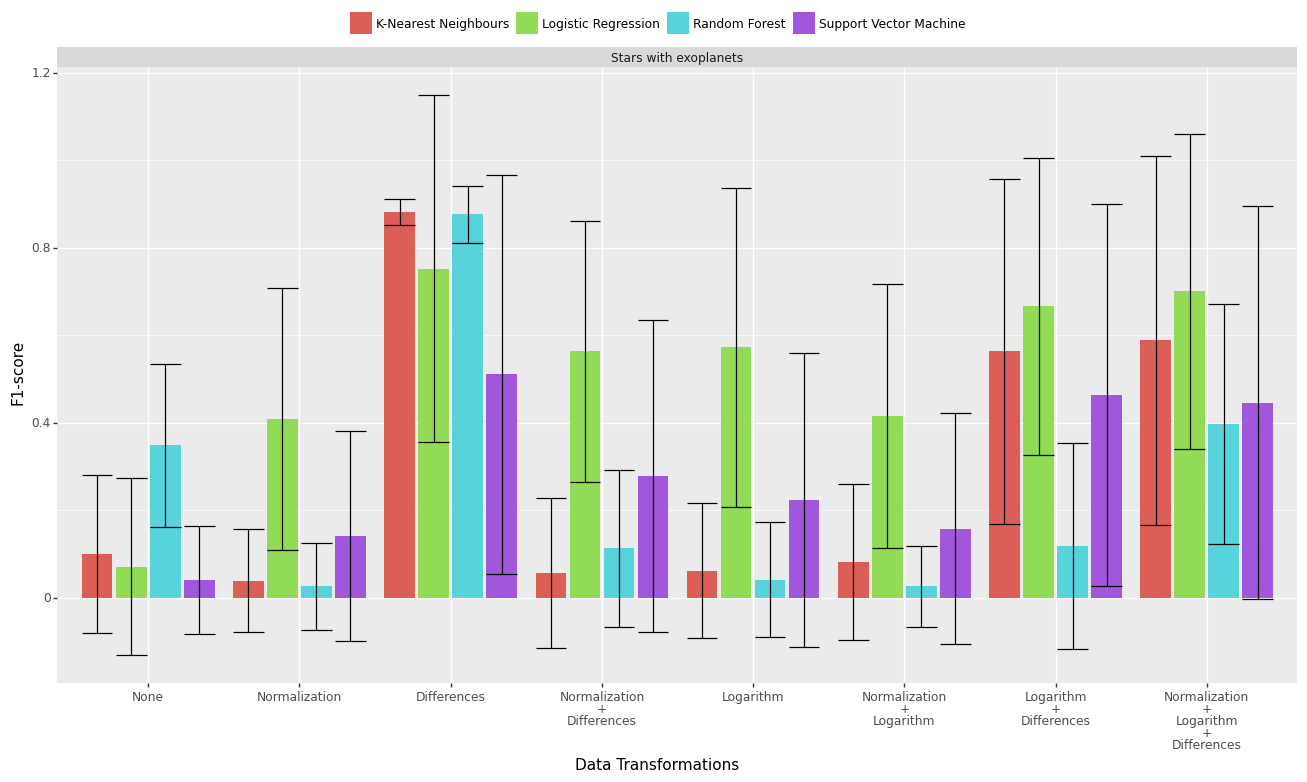

<ggplot: (679401974)>

In [20]:
p9.ggplot(average_metrics[average_metrics['class'] == 'Stars with exoplanets'],
  p9.aes(x = 'data_transformation', y = 'f1_score_mean', fill = 'algorithm')
  ) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2()) + \
  p9.geom_errorbar(p9.aes(ymin = 'f1_score_mean - f1_score_sd', ymax = 'f1_score_mean + f1_score_sd'), position = p9.position_dodge2(), width = .9) + \
  p9.xlab('Data Transformations') + \
  p9.ylab('F1-score') + \
  p9.facet_wrap(facets = '~class', ncol = 1, scales = 'free_y') + \
  p9.theme(
    legend_title = p9.element_blank(),
    legend_position = 'top',
    legend_box_margin = 0,
    subplots_adjust = {
      'hspace' : 0.1,
    },
    figure_size = (16, 8),
  )

In [21]:
average_metrics_transformation = df_long[df_long['metric'] == 'f1_score'][['class', 'algorithm', 'hyper_parameters', 'data_transformation', 'value']] \
  .groupby(by = ['class', 'data_transformation']).agg(f1_score_mean = ('value', 'mean'), f1_score_sd = ('value', 'std')).apply(lambda x : round(x, 3))
average_metrics_transformation.reset_index(inplace = True)
average_metrics_transformation['label'] = average_metrics_transformation.apply(lambda x : str(round(x['f1_score_mean'], 2)) + ' ± ' + str(round(x['f1_score_sd'], 2)), axis = 1)

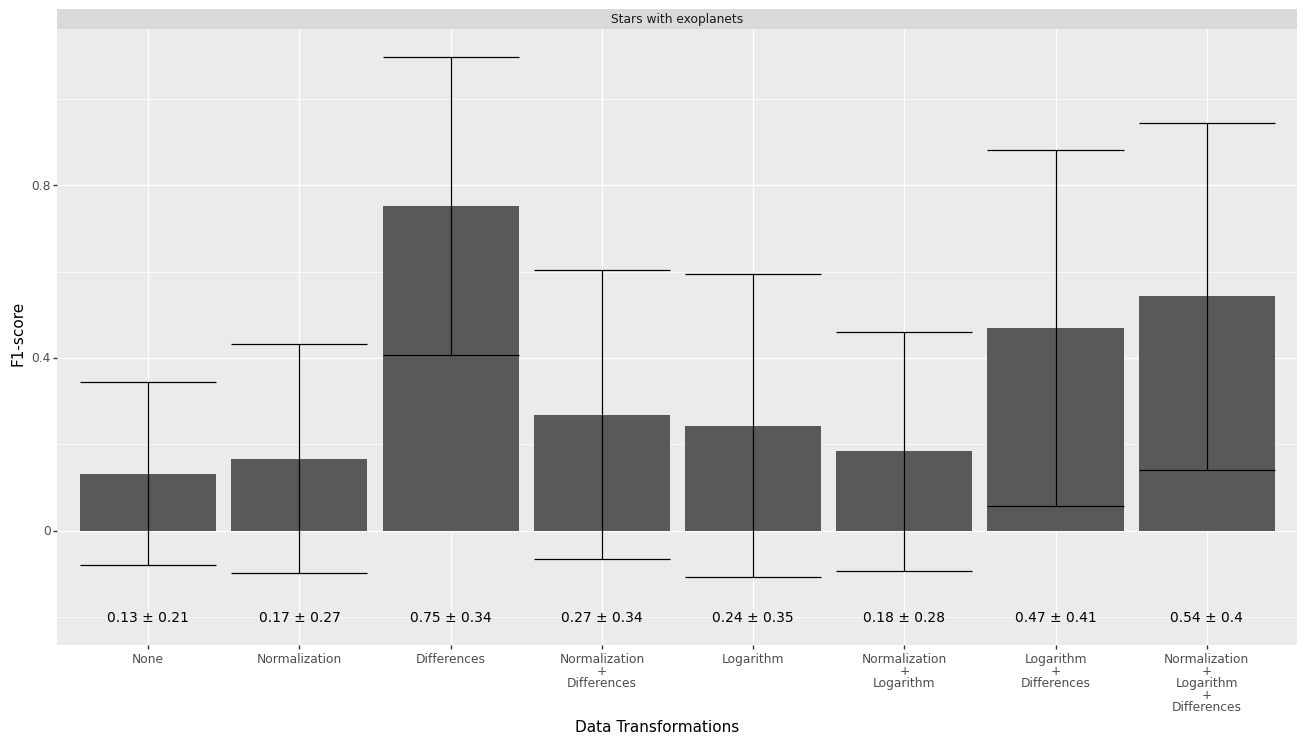

<ggplot: (679396947)>

In [22]:
p9.ggplot(average_metrics_transformation[average_metrics_transformation['class'] == 'Stars with exoplanets'],
  p9.aes(x = 'data_transformation', y = 'f1_score_mean')
  ) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2()) + \
  p9.geom_errorbar(p9.aes(ymin = 'f1_score_mean - f1_score_sd', ymax = 'f1_score_mean + f1_score_sd'), position = p9.position_dodge2(), width = .9) + \
  p9.geom_text(p9.aes(y = -0.2, label = 'label'), color = 'black', position = p9.position_dodge2(width = 0.9), size = 10) + \
  p9.xlab('Data Transformations') + \
  p9.ylab('F1-score') + \
  p9.facet_wrap(facets = '~class', ncol = 1, scales = 'free_y') + \
  p9.theme(
    legend_title = p9.element_blank(),
    legend_position = 'top',
    subplots_adjust = {
      'hspace' : 0.1,
    },
    figure_size = (16, 8),
  )

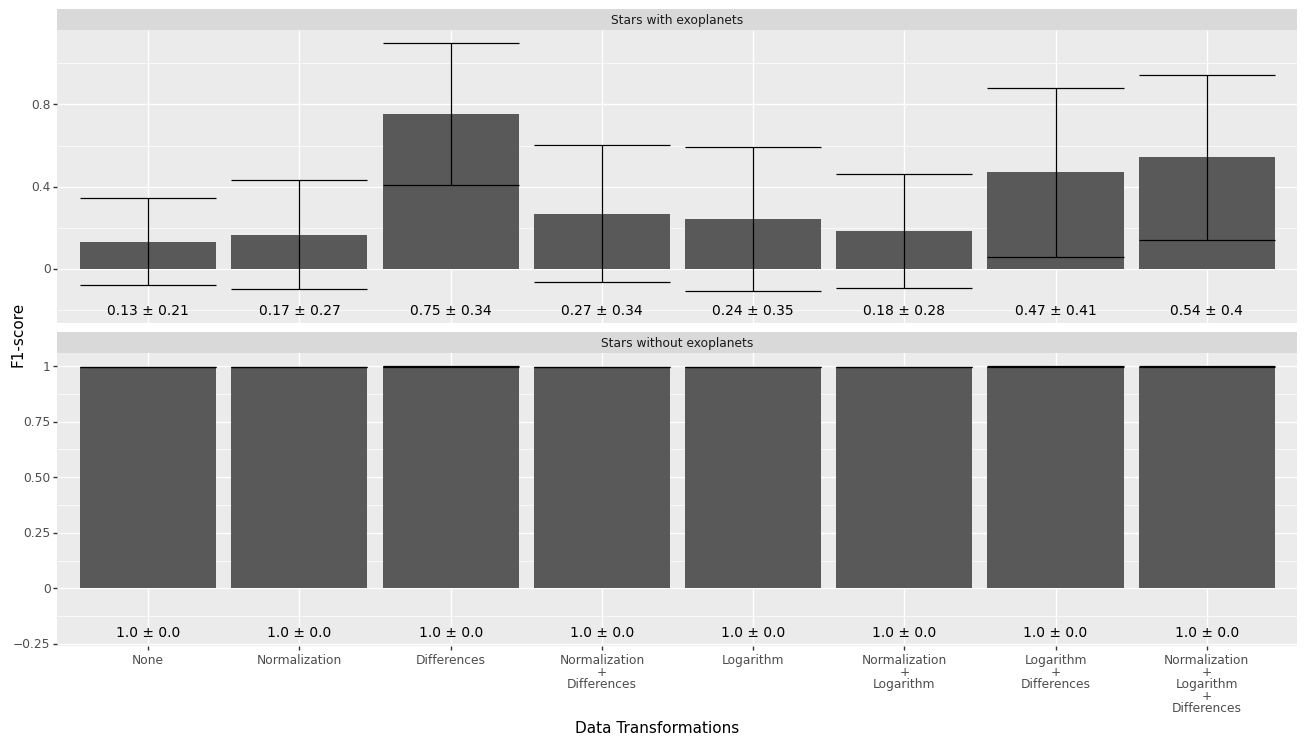

<ggplot: (679539382)>

In [23]:
p9.ggplot(average_metrics_transformation,
  p9.aes(x = 'data_transformation', y = 'f1_score_mean')
  ) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2()) + \
  p9.geom_errorbar(p9.aes(ymin = 'f1_score_mean - f1_score_sd', ymax = 'f1_score_mean + f1_score_sd'), position = p9.position_dodge2(), width = .9) + \
  p9.geom_text(p9.aes(y = -0.2, label = 'label'), color = 'black', position = p9.position_dodge2(width = 0.9), size = 10) + \
  p9.xlab('Data Transformations') + \
  p9.ylab('F1-score') + \
  p9.facet_wrap(facets = '~class', ncol = 1, scales = 'free_y') + \
  p9.theme(
    legend_title = p9.element_blank(),
    legend_position = 'top',
    subplots_adjust = {
      'hspace' : 0.1,
    },
    figure_size = (16, 8),
  )

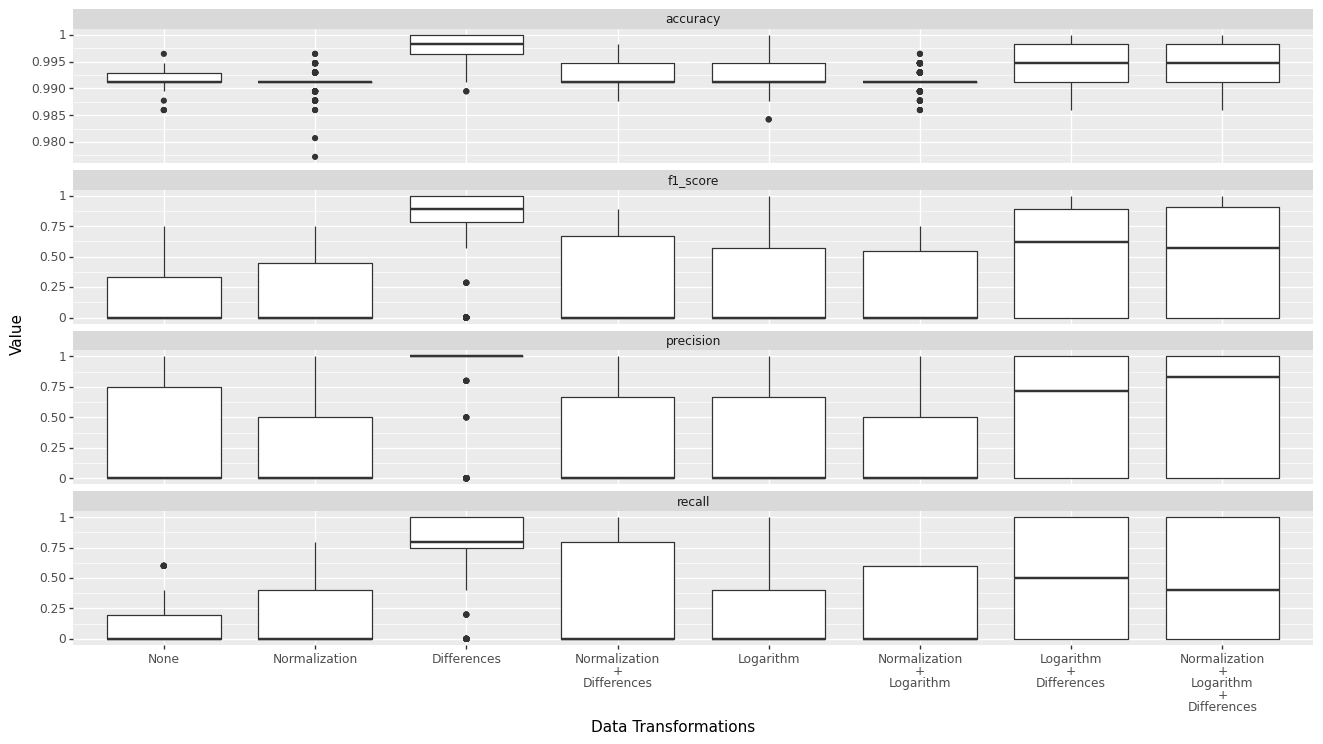

<ggplot: (679397025)>

In [24]:
p9.ggplot(df_long[(df_long['method'] == 'features') & (df_long['class'] == 'Stars with exoplanets')],
  p9.aes(x = 'data_transformation', y = 'value')
  ) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Data Transformations') + \
  p9.ylab('Value') + \
  p9.facet_wrap(facets = '~metric', ncol = 1, scales = 'free_y') + \
  p9.theme(
    legend_title = p9.element_blank(),
    legend_position = 'top',
    legend_box_spacing = 0,
    legend_box_margin = 1,
    subplots_adjust = {
      'hspace' : 0.2
    },
    figure_size = (16, 8),
  )

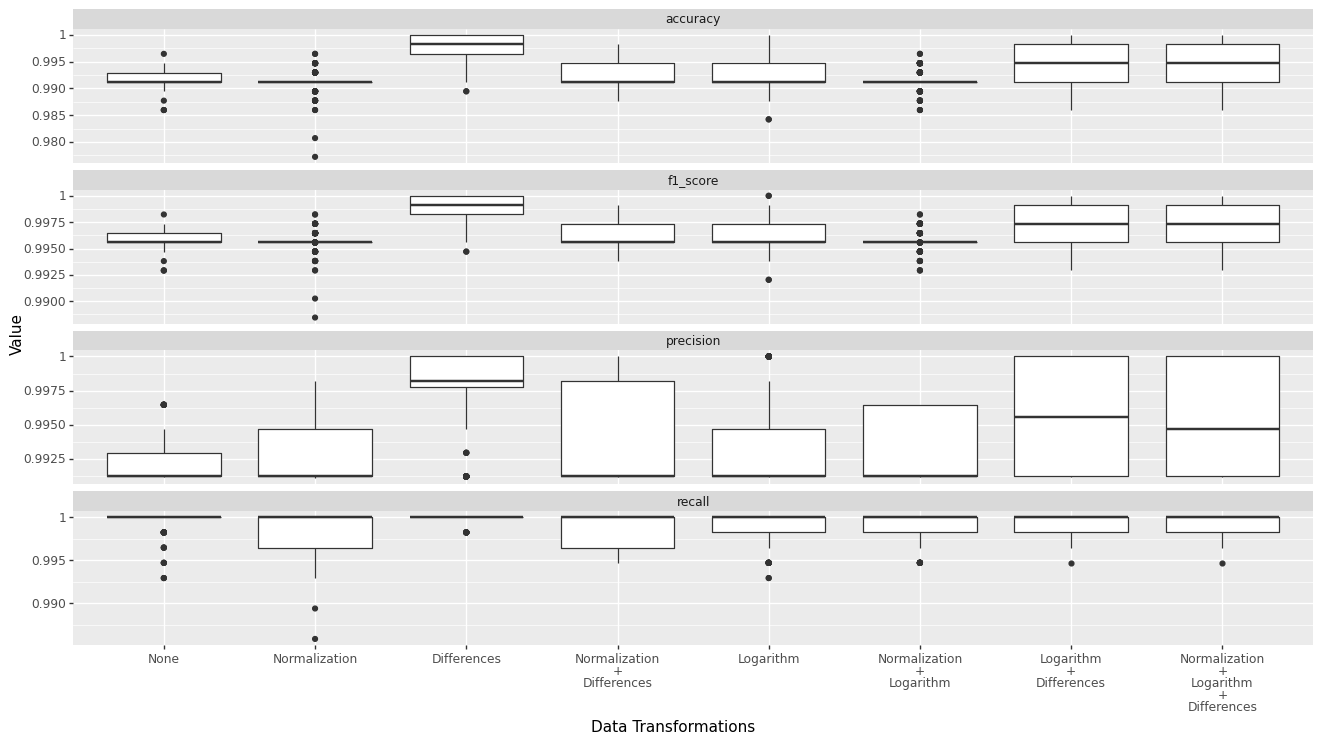

<ggplot: (679884752)>

In [25]:
p9.ggplot( df_long[(df_long['method'] == 'features') & (df_long['class'] == 'Stars without exoplanets')],
  p9.aes(x = 'data_transformation', y = 'value')
  ) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Data Transformations') + \
  p9.ylab('Value') + \
  p9.facet_wrap(facets = '~metric', ncol = 1, scales = 'free_y') + \
  p9.theme(
    legend_title = p9.element_blank(),
    legend_position = 'top',
    legend_box_spacing = 0,
    legend_box_margin = 1,
    subplots_adjust = {
      'hspace' : 0.2
    },
    figure_size = (16, 8),
  )

### Analysis of all "perfect" models 

In [26]:
df['data_transformation'] = df['normalization'].apply(lambda x : 'Normalization' if x == 1 else '')
df['data_transformation'] = df['data_transformation'] + ' ' + df['logarithm'].apply(lambda x : 'Logarithm' if x == 1 else '')
df['data_transformation'] = df['data_transformation'] + ' ' + df['differences'].apply(lambda x : 'Differences' if x == 1 else '')
df['data_transformation'] = df['data_transformation'].apply(lambda x : '\n+\n'.join(x.split()))
df['data_transformation'] = df['data_transformation'].apply(lambda x : 'None' if x == '' else x)

In [27]:
perfect_performance_df = df[(df['f1_score'] == df['f1_score'].max()) & (df['method'] == 'features') & (df['class'] == 'EXOPLANETS')]
perfect_performance_df

,class,normalization,logarithm,differences,algorithm,hyper_parameters,precision,recall,f1_score,method,variance_threshold,accuracy,data_transformation
29,EXOPLANETS,1,1,1,Logistic Regression,"{'C': 0.1, 'max_iter': 100000, 'n_jobs': -1, '...",1.0,1.0,1.0,features,NaN,1.0,Normalization\n+\nLogarithm\n+\nDifferences
77,EXOPLANETS,1,1,1,Logistic Regression,"{'C': 0.1, 'max_iter': 100000, 'n_jobs': -1, '...",1.0,1.0,1.0,features,NaN,1.0,Normalization\n+\nLogarithm\n+\nDifferences
121,EXOPLANETS,1,1,1,Logistic Regression,"{'C': 0.1, 'l1_ratio': 1, 'max_iter': 100000, ...",1.0,1.0,1.0,features,NaN,1.0,Normalization\n+\nLogarithm\n+\nDifferences
145,EXOPLANETS,1,1,1,K-Nearest Neighbours,"{'algorithm': 'ball_tree', 'n_jobs': -1, 'n_ne...",1.0,1.0,1.0,features,NaN,1.0,Normalization\n+\nLogarithm\n+\nDifferences
147,EXOPLANETS,1,1,1,K-Nearest Neighbours,"{'algorithm': 'ball_tree', 'n_jobs': -1, 'n_ne...",1.0,1.0,1.0,features,NaN,1.0,Normalization\n+\nLogarithm\n+\nDifferences
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,EXOPLANETS,0,0,1,Support Vector Machine,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}",1.0,1.0,1.0,features,NaN,1.0,Differences
477,EXOPLANETS,0,0,1,Support Vector Machine,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",1.0,1.0,1.0,features,NaN,1.0,Differences
481,EXOPLANETS,0,0,1,Support Vector Machine,"{'C': 10, 'gamma': 'auto', 'kernel': 'poly'}",1.0,1.0,1.0,features,NaN,1.0,Differences
483,EXOPLANETS,0,0,1,Support Vector Machine,"{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}",1.0,1.0,1.0,features,NaN,1.0,Differences


In [28]:
# Differences
perfect_performance_df[(perfect_performance_df['algorithm'] == 'Logistic Regression') & (perfect_performance_df['data_transformation'] == 'Differences')]['hyper_parameters'].iloc[0]

"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1, 'penalty': None, 'solver': 'lbfgs'}"

In [29]:
# All transformations
perfect_performance_df[(perfect_performance_df['algorithm'] == 'Logistic Regression') & (perfect_performance_df['data_transformation'] == 'Normalization\n+\nLogarithm\n+\nDifferences')]['hyper_parameters'].iloc[0]

"{'C': 0.1, 'max_iter': 100000, 'n_jobs': -1, 'penalty': 'l2', 'solver': 'lbfgs'}"

In [30]:
perfect_performance_df[['normalization', 'logarithm', 'differences', 'algorithm']].value_counts().reset_index(name = 'count')

,normalization,logarithm,differences,algorithm,count
0,0,0,1,Logistic Regression,46
1,0,0,1,Support Vector Machine,22
2,1,1,1,K-Nearest Neighbours,21
3,1,1,1,Support Vector Machine,11
4,1,1,1,Logistic Regression,3
5,0,1,0,Support Vector Machine,2
6,0,1,1,Logistic Regression,2
7,0,1,1,Random Forest,2
8,0,1,1,Support Vector Machine,2


## Best hyper-parameters for each model

In [31]:
best_performing_model_hyper_parameters = perfect_performance_df[perfect_performance_df['data_transformation'].isin(['Differences', 'Logarithm\n+\nDifferences', 'Normalization\n+\nLogarithm\n+\nDifferences'])][['algorithm', 'hyper_parameters', 'data_transformation']].drop_duplicates()
best_performing_model_hyper_parameters['hyper_parameters'] = best_performing_model_hyper_parameters['hyper_parameters'].apply(lambda x : json.loads(str(x).replace('\'', '\"').replace('None', 'null')))

In [32]:
best_performing_model_hyper_parameters = best_performing_model_hyper_parameters.reset_index(drop = True).join(pd.json_normalize(best_performing_model_hyper_parameters['hyper_parameters']).rename(columns = {'algorithm' : 'algorithm_hyper_parameter'})) \
  .drop(columns = ['hyper_parameters']) \
  .melt(id_vars = ['algorithm', 'data_transformation'], var_name = 'variable', value_name = 'value')

In [33]:
best_performing_model_hyper_parameters_count = best_performing_model_hyper_parameters.groupby(by = ['algorithm', 'data_transformation', 'variable', 'value']).size().reset_index(name = 'count')

In [34]:
for _, row in best_performing_model_hyper_parameters_count[['algorithm', 'data_transformation']].drop_duplicates().iterrows():
  print('-' * 20, row['algorithm'], '---', row['data_transformation'].replace('\n', ' '), '-' * 20)
  print(
    best_performing_model_hyper_parameters_count[(best_performing_model_hyper_parameters_count['algorithm'] == row['algorithm']) & (best_performing_model_hyper_parameters_count['data_transformation'] == row['data_transformation'])] \
      .sort_values(by = 'count', ascending = False)[['variable', 'value', 'count']]
  )

-------------------- K-Nearest Neighbours --- Normalization + Logarithm + Differences --------------------
                     variable      value  count
3                      n_jobs       -1.0     21
8                           p        2.0     21
9                     weights   distance     12
10                    weights    uniform      9
0   algorithm_hyper_parameter  ball_tree      7
1   algorithm_hyper_parameter      brute      7
2   algorithm_hyper_parameter    kd_tree      7
4                 n_neighbors        2.0      6
5                 n_neighbors        3.0      6
6                 n_neighbors        5.0      6
7                 n_neighbors        8.0      3
-------------------- Logistic Regression --- Differences --------------------
    variable       value  count
21  max_iter    100000.0     46
22    n_jobs        -1.0     46
28    solver        saga     25
25   penalty          l2     11
27    solver         sag     11
23   penalty  elasticnet     11
15         C   

In [35]:
best_performing_model_hyper_parameters_csv = perfect_performance_df[perfect_performance_df['data_transformation'].isin(['Differences', 'Logarithm\n+\nDifferences', 'Normalization\n+\nLogarithm\n+\nDifferences'])][['algorithm', 'hyper_parameters', 'data_transformation']].drop_duplicates()
best_performing_model_hyper_parameters_csv['data_transformation'] = best_performing_model_hyper_parameters_csv['data_transformation'].apply(lambda x : x.replace('\n', ' '))
best_performing_model_hyper_parameters_csv.to_csv(os.path.join('./best_performance/', 'best_performing_model_hyper_parameters.csv'), index = False)

# PCA

In [36]:
df_long[(df_long['metric'] == 'f1_score') & (df_long['class'] == 'Stars with exoplanets')]#.groupby(['algorithm', 'method', 'data_transformation', 'variance_threshold']).agg(mean = ('value', 'mean'), sd = ('value', 'std')).apply(lambda x : round(x, 3)).reset_index()

,class,normalization,logarithm,differences,algorithm,hyper_parameters,method,variance_threshold,metric,value,data_transformation
78081,Stars with exoplanets,1,1,0,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",features,NaN,f1_score,0.60000,Normalization\n+\nLogarithm
78083,Stars with exoplanets,1,1,0,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",features,NaN,f1_score,0.60000,Normalization\n+\nLogarithm
78085,Stars with exoplanets,1,1,0,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",features,NaN,f1_score,0.00000,Normalization\n+\nLogarithm
78087,Stars with exoplanets,1,1,0,Logistic Regression,"{'C': 0.0001, 'max_iter': 100000, 'n_jobs': -1...",features,NaN,f1_score,0.00000,Normalization\n+\nLogarithm
78089,Stars with exoplanets,1,1,0,Logistic Regression,"{'C': 0.001, 'max_iter': 100000, 'n_jobs': -1,...",features,NaN,f1_score,0.60000,Normalization\n+\nLogarithm
...,...,...,...,...,...,...,...,...,...,...,...
117111,Stars with exoplanets,1,0,1,Support Vector Machine,"{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}",principal_components,0.01,f1_score,0.00000,Normalization\n+\nDifferences
117113,Stars with exoplanets,1,0,1,Support Vector Machine,"{'C': 10, 'gamma': 'auto', 'kernel': 'poly'}",principal_components,0.01,f1_score,0.66667,Normalization\n+\nDifferences
117115,Stars with exoplanets,1,0,1,Support Vector Machine,"{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}",principal_components,0.01,f1_score,0.66667,Normalization\n+\nDifferences
117117,Stars with exoplanets,1,0,1,Support Vector Machine,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",principal_components,0.01,f1_score,0.88889,Normalization\n+\nDifferences


In [37]:
pca_analysis_df = df_long[(df_long['metric'] == 'f1_score') & (df_long['class'] == 'Stars with exoplanets')].copy()

In [38]:
pca_analysis_df['data_transformation'] = pca_analysis_df['data_transformation'].apply(lambda x : re.sub(r'\n', ' ', x))

In [39]:
pca_analysis_df['variance_threshold'] = pca_analysis_df['variance_threshold'].apply(lambda x : 1.0 if pd.isna(x) else x)
pca_analysis_df['variance_threshold'] = pca_analysis_df['variance_threshold'].apply(lambda x : str(int(x * 100)) + '%')
pca_analysis_df['variance_threshold'] = pd.Categorical(pca_analysis_df['variance_threshold'], ['100%', '99%', '95%', '90%', '75%', '50%', '25%', '10%', '5%', '1%'][::-1])

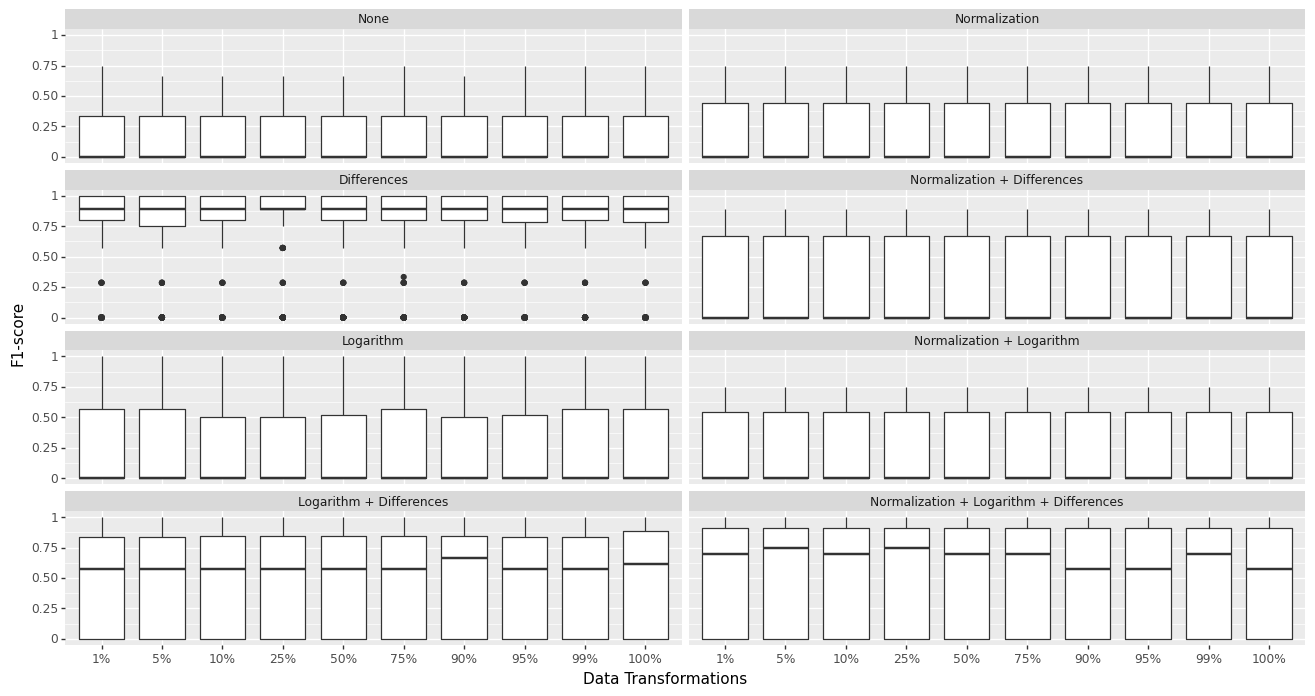

<ggplot: (680133356)>

In [40]:
p9.ggplot(pca_analysis_df,
  p9.aes(x = 'variance_threshold', y = 'value', group = 'variance_threshold')
  ) + \
  p9.theme_gray() + \
  p9.geom_boxplot() + \
  p9.xlab('Data Transformations') + \
  p9.ylab('F1-score') + \
  p9.facet_wrap(facets = '~data_transformation', ncol = 2) + \
  p9.theme(
    legend_title = p9.element_blank(),
    legend_position = 'top',
    legend_box_spacing = 0,
    legend_box_margin = 1,
    subplots_adjust = {
      'hspace' : 0.2
    },
    figure_size = (16, 8),
  )

In [41]:
average_pca_analysis_transformation = pca_analysis_df[['algorithm', 'variance_threshold', 'value', 'data_transformation']].groupby(['variance_threshold', 'data_transformation']).agg(f1_score_mean = ('value', 'mean'), f1_score_sd = ('value', 'std')).apply(lambda x : round(x, 3))
average_pca_analysis_transformation.reset_index(inplace = True)
average_pca_analysis_transformation['label'] = average_pca_analysis_transformation.apply(lambda x : str(round(x['f1_score_mean'], 2)) + ' ± ' + str(round(x['f1_score_sd'], 2)), axis = 1)

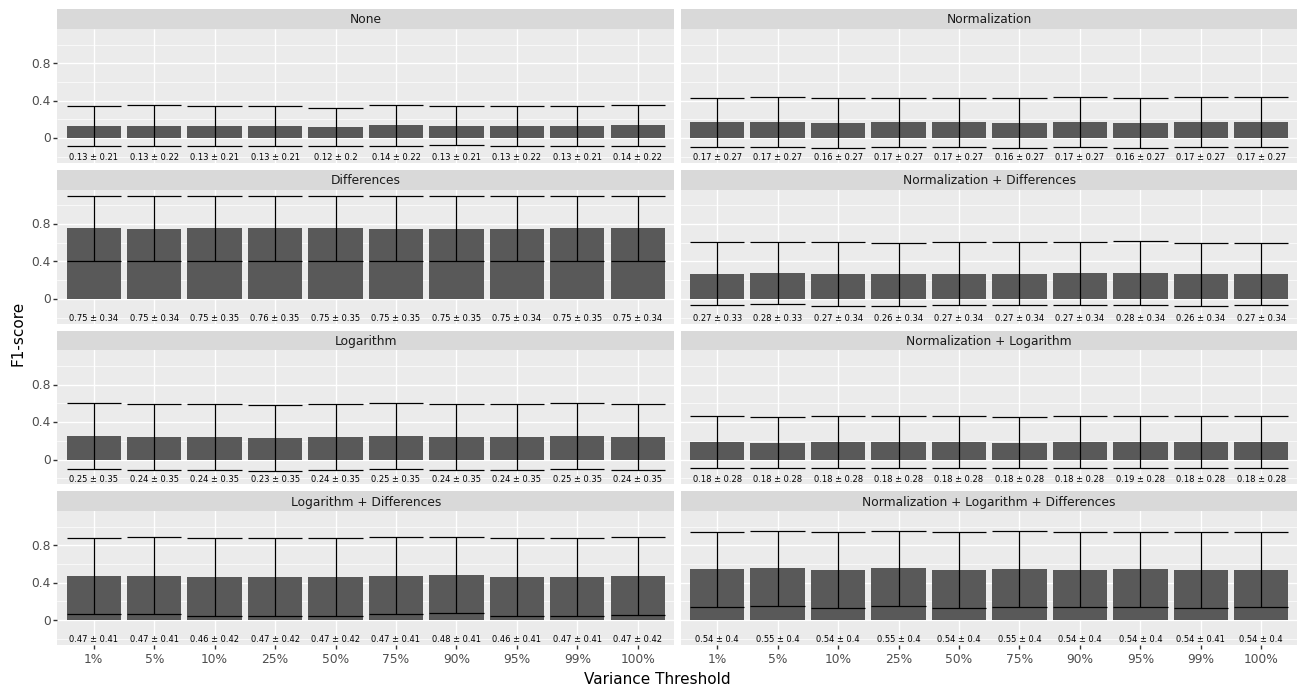

<ggplot: (680301845)>

In [42]:
p9.ggplot(average_pca_analysis_transformation,
  p9.aes(x = 'variance_threshold', y = 'f1_score_mean')
  ) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2()) + \
  p9.geom_errorbar(p9.aes(ymin = 'f1_score_mean - f1_score_sd', ymax = 'f1_score_mean + f1_score_sd'), position = p9.position_dodge2(), width = .9) + \
  p9.geom_text(p9.aes(y = -0.2, label = 'label'), color = 'black', position = p9.position_dodge2(width = 0.9), size = 6) + \
  p9.xlab('Variance Threshold') + \
  p9.ylab('F1-score') + \
  p9.facet_wrap(facets = '~data_transformation', ncol = 2) + \
  p9.theme(
    legend_title = p9.element_blank(),
    legend_position = 'top',
    subplots_adjust = {
      'hspace' : 0.2,
    },
    figure_size = (16, 8),
  )

## Significance testing

In [43]:
pca_significance_testing_df = pca_analysis_df[['algorithm', 'hyper_parameters', 'data_transformation', 'variance_threshold', 'value']] \
  .pivot(index = ['algorithm', 'hyper_parameters', 'data_transformation'], columns = 'variance_threshold', values = 'value') \
  .reset_index() \
  .sort_values(by = ['data_transformation', 'algorithm', 'hyper_parameters'])

In [44]:
pca_significance_testing_df['data_transformation'].unique()

['None', 'Normalization', 'Differences', 'Normalization + Differences', 'Logarithm', 'Normalization + Logarithm', 'Logarithm + Differences', 'Normalization + Logarithm + Differences']
Categories (8, object): ['None', 'Normalization', 'Differences', 'Normalization + Differences', 'Logarithm', 'Normalization + Logarithm', 'Logarithm + Differences', 'Normalization + Logarithm + Differences']

In [45]:
# Based on https://www.geeksforgeeks.org/how-to-conduct-a-paired-samples-t-test-in-python/
import scipy.stats as stats 

for i , transformation in enumerate(['None', 'Normalization', 'Differences', 'Normalization + Differences', 'Logarithm', 'Normalization + Logarithm', 'Logarithm + Differences', 'Normalization + Logarithm + Differences']): 
  print('-' * 20, transformation, '-' * 20)
  
  # 8 data transformations, 244 models for each
  from_index = 244 * i
  to_index = 244 * (i + 1)

  pca_f1_score_transformations = pca_significance_testing_df[from_index:to_index].iloc[:, 3:].T.values

  for index, variance_threshold in enumerate([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]):
    print('#' * 20, variance_threshold, '#' * 20)

    # H0: Mean pre-PCA and post-PCA scores are equal
    # H1: Mean pre-PCA and post-PCA scores are not equal
    statistic, p_value = stats.ttest_rel(pca_f1_score_transformations[-1], pca_f1_score_transformations[index])
    # 95% confidence -- p-value < 0.05 => reject the null hypothesis (H0), i.e., the true mean test score is different before and after PCA
    print('Statistic:', statistic, 'P-value:', p_value, 'Reject H0?', p_value < 0.05)

-------------------- None --------------------
#################### 0.01 ####################
Statistic: 0.8658560818961317 P-value: 0.38742314615855056 Reject H0? False
#################### 0.05 ####################
Statistic: 0.5316187391822021 P-value: 0.595475725071176 Reject H0? False
#################### 0.1 ####################
Statistic: 0.5460550127022358 P-value: 0.5855290857839932 Reject H0? False
#################### 0.25 ####################
Statistic: 0.91780800008748 P-value: 0.35962944012734865 Reject H0? False
#################### 0.5 ####################
Statistic: 2.249679501934021 P-value: 0.02536496241233046 Reject H0? True
#################### 0.75 ####################
Statistic: 0.4464444867343151 P-value: 0.6556737876297141 Reject H0? False
#################### 0.9 ####################
Statistic: 0.9002734916432532 P-value: 0.368866046420828 Reject H0? False
#################### 0.95 ####################
Statistic: 0.7560496497615546 P-value: 0.45035172185102823